# Searching for Free Space

After an obstacle is detected, the robot must turn either left or right in search for free space, and move forward again.

<img align="right" src="img/free_choice.png" />
Here is one possible solution:

* `Find the minimum of the left sensors (0, 1, 2)`
* `Find the minimum of the right sensors (5, 6, 7)`
* `If the left minimum is bigger than the right minimum`
  * `Turn left`
* `Else`
  * `Turn right`
* `In any case, keep turning until both front sensors (3, 4) are bigger than the chosen minimum`

In the sample figure, the robot would turn right, since the minimum of the right side sensors (green arc) is bigger than the one of the left side (red arc).

In [1]:
import packages.initialization
import pioneer3dx as p3dx
p3dx.init()

#### Minimum and maximum of an array

For finding the minimum and maximum of an array, you can use the [Python built-in functions min and max](https://docs.python.org/2/library/functions.html#max).

In [2]:
p3dx.distance

[2.660367965698242,
 5.147482395172119,
 2.3926870822906494,
 3.885563611984253,
 3.855074167251587,
 4.512728691101074,
 1.3826019763946533,
 3.867016315460205]

In [3]:
min(p3dx.distance)

1.3974640369415283

In [4]:
max(p3dx.distance)

5.126923084259033

You can use only some values of the array, with the [Python slice notation for lists](http://stackoverflow.com/questions/509211/explain-pythons-slice-notation):

In [5]:
# left sensors (0,1,2)
p3dx.distance[0:3]

[2.69618558883667, 5.041738986968994, 2.3684632778167725]

In [6]:
# front sensors (3,4)
p3dx.distance[3:5]

[3.8899595737457275, 3.931875467300415]

In [7]:
# right sensors (5,6,7)
p3dx.distance[5:]

[1.2222063541412354, 3.985966920852661, 3.6622862815856934]

In [7]:
# left sensors (0,1,2)
minLeft = min(p3dx.distance[0:3])
print minLeft

# right sensors (5,6,7)
minRight = min(p3dx.distance[5:])
print minRight

# front sensors (3,4)
front = p3dx.distance[3:5]
print p3dx.distance[3],p3dx.distance[4]

2.33564782143
1.40835738182
3.93690347672 3.90785503387


#### Exercise

Implement the above-mentioned algorithm for turning towards free space:
* `Find the minimum of the left sensors (0, 1, 2)`
* `Find the minimum of the right sensors (5, 6, 7)`
* `If the left minimum is bigger than the right minimum`
  * `Turn left`
* `Else`
  * `Turn right`
* `In any case, keep turning until both front sensors (3, 4) are bigger than the chosen minimum`

In [8]:
# left sensors (0,1,2)
minLeft = min(p3dx.distance[0:3])
print minLeft

# right sensors (5,6,7)
minRight = min(p3dx.distance[5:])
print minRight

# front sensors (3,4)
minFront = min(p3dx.distance[3:5])
print p3dx.distance[3],p3dx.distance[4]

if minLeft > minRight:
    while min(p3dx.distance[3:5]) < minLeft:
        p3dx.move(-1,1) #turn left
else:
    while min(p3dx.distance[3:5]) < minRight:
        p3dx.move(1,-1) #turn right
p3dx.stop()

print p3dx.distance[3],p3dx.distance[4]

2.40314030647
1.38674116135
3.90887403488 3.84389996529
3.89153122902 3.8246691227


You can plot a diagram with the resulting position of the robot in the environment, and the measurements of the ultrasonic sensors.

In [9]:
%matplotlib inline
import ultrasonic

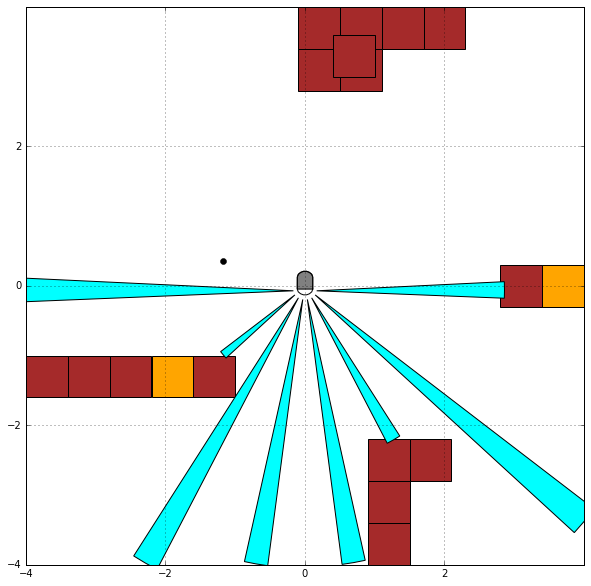

In [10]:
ultrasonic.plot()

Let's put together the last two exercises in a simple application: [wandering](Wandering.ipynb).